In [2]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from config import (censuskey, crimekey)
from census import Census
from scipy.stats import linregress

In [14]:
URL = (f'https://api.usa.gov/crime/fbi/sapi/api/summarized/state/CA/violent-crime/2019/2019?API_KEY={crimekey}')

getdatasets = requests.get(URL)
datasets_json = getdatasets.json()
pprint(datasets_json)

{'pagination': {'count': 740, 'page': 0, 'pages': 37, 'per_page': 20},
 'results': [{'actual': 633,
              'cleared': 325,
              'data_range': None,
              'data_year': 2019,
              'offense': 'violent-crime',
              'ori': 'CA0010000',
              'state_abbr': 'CA'},
             {'actual': 162,
              'cleared': 66,
              'data_range': None,
              'data_year': 2019,
              'offense': 'violent-crime',
              'ori': 'CA0010100',
              'state_abbr': 'CA'},
             {'actual': 40,
              'cleared': 13,
              'data_range': None,
              'data_year': 2019,
              'offense': 'violent-crime',
              'ori': 'CA0010200',
              'state_abbr': 'CA'},
             {'actual': 618,
              'cleared': 146,
              'data_range': None,
              'data_year': 2019,
              'offense': 'violent-crime',
              'ori': 'CA0010300',
              'stat

In [3]:
stateAbbs = ['AL', 'AK', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS',
            'KY', 'LA', 'MA', 'ME', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 
            'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
statedict = {}
record = 1

# loop through all states and pull data for each
for item in stateAbbs:
    page = 0
    query_url = "https://api.usa.gov/crime/fbi/sapi/api/summarized/state/" + item + "/violent-crime/2019/2019?API_KEY=" + crimekey
    # Get response into JSON
    stateresponse = requests.get(query_url)
    statejson = stateresponse.json()
    pages = statejson['pagination']['pages']
    actuals = 0
    try:
        for j in range(pages):
            query_url = "https://api.usa.gov/crime/fbi/sapi/api/summarized/state/" + item + "/violent-crime/2019/2019?page=" + str(j) + "&API_KEY=" + crimekey
            # Get response into JSON
            stateresponse = requests.get(query_url)
            statejson = stateresponse.json()   
            x = len(statejson['results'])
            # Log each state and account for exceptions
            try:
                # Collect crime data and put it into a dictionary
                for i in range(x):
                    actuals = actuals + statejson['results'][i]['actual']
                    statedict[item] = [actuals]
                print(f"Processing record {record} | {item}")
                record += 1

            # Exception if state data isn't found
            except:
                print(f"Data not found for {item}. Skipping...")
    except:
        print(f"Page(s) not found for {item}. Skipping...")

print("----------Job complete!----------")

Processing record 1 | AL
Processing record 2 | AL
Processing record 3 | AL
Processing record 4 | AL
Processing record 5 | AL
Processing record 6 | AL
Processing record 7 | AL
Processing record 8 | AL
Processing record 9 | AL
Processing record 10 | AL
Processing record 11 | AL
Processing record 12 | AL
Processing record 13 | AL
Processing record 14 | AL
Processing record 15 | AL
Processing record 16 | AL
Processing record 17 | AL
Processing record 18 | AL
Processing record 19 | AK
Processing record 20 | AK
Processing record 21 | AR
Processing record 22 | AR
Processing record 23 | AR
Processing record 24 | AR
Processing record 25 | AR
Processing record 26 | AR
Processing record 27 | AR
Processing record 28 | AR
Processing record 29 | AR
Processing record 30 | AR
Processing record 31 | AR
Processing record 32 | AR
Processing record 33 | AR
Processing record 34 | AR
Processing record 35 | AR
Processing record 36 | AZ
Processing record 37 | AZ
Processing record 38 | AZ
Processing record 39 

Processing record 309 | ME
Processing record 310 | MD
Processing record 311 | MD
Processing record 312 | MD
Processing record 313 | MD
Processing record 314 | MD
Processing record 315 | MD
Processing record 316 | MD
Processing record 317 | MD
Processing record 318 | MI
Processing record 319 | MI
Processing record 320 | MI
Processing record 321 | MI
Processing record 322 | MI
Processing record 323 | MI
Processing record 324 | MI
Processing record 325 | MI
Processing record 326 | MI
Processing record 327 | MI
Processing record 328 | MI
Processing record 329 | MI
Processing record 330 | MI
Processing record 331 | MI
Processing record 332 | MI
Processing record 333 | MI
Processing record 334 | MI
Processing record 335 | MI
Processing record 336 | MI
Processing record 337 | MI
Processing record 338 | MI
Processing record 339 | MI
Processing record 340 | MI
Processing record 341 | MI
Processing record 342 | MI
Processing record 343 | MI
Processing record 344 | MI
Processing record 345 | MI
P

Processing record 613 | PA
Processing record 614 | PA
Processing record 615 | PA
Processing record 616 | PA
Processing record 617 | PA
Processing record 618 | PA
Processing record 619 | PA
Processing record 620 | PA
Processing record 621 | PA
Processing record 622 | PA
Processing record 623 | PA
Processing record 624 | PA
Processing record 625 | PA
Processing record 626 | PA
Processing record 627 | PA
Processing record 628 | PA
Processing record 629 | PA
Processing record 630 | PA
Processing record 631 | PA
Processing record 632 | PA
Processing record 633 | PA
Processing record 634 | PA
Processing record 635 | PA
Processing record 636 | PA
Processing record 637 | PA
Processing record 638 | PA
Processing record 639 | PA
Processing record 640 | PA
Processing record 641 | PA
Processing record 642 | PA
Processing record 643 | PA
Processing record 644 | PA
Processing record 645 | PA
Processing record 646 | PA
Processing record 647 | PA
Processing record 648 | PA
Processing record 649 | PA
P

In [5]:
statedict

{'AL': [9504],
 'AK': [6343],
 'AR': [17096],
 'AZ': [31198],
 'CA': [173298],
 'CO': [22008],
 'CT': [6583],
 'DE': [4127],
 'DC': [7403],
 'FL': [81095],
 'GA': [27457],
 'HI': [3750],
 'ID': [4154],
 'IL': [51506],
 'IN': [20616],
 'IA': [8860],
 'KS': [11066],
 'KY': [9869],
 'LA': [24192],
 'MA': [22469],
 'ME': [1562],
 'MD': [27514],
 'MI': [43430],
 'MN': [13335],
 'MO': [30578],
 'MS': [4580],
 'MT': [4419],
 'NC': [36603],
 'ND': [2142],
 'NE': [5759],
 'NH': [2043],
 'NJ': [18382],
 'NM': [15633],
 'NV': [15269],
 'NY': [69379],
 'OH': [32727],
 'OK': [17232],
 'OR': [12062],
 'PA': [33772],
 'RI': [2357],
 'SC': [25649],
 'SD': [3019],
 'TN': [40883],
 'TX': [121331],
 'UT': [7421],
 'VA': [17898],
 'VT': [1294],
 'WA': [23007],
 'WI': [17036],
 'WV': [4621],
 'WY': [1097]}

In [6]:
# Convert the dictionary into a dataframe
stdf = pd.DataFrame.from_dict(statedict, orient='index')
stdf

,0
AL,9504
AK,6343
AR,17096
AZ,31198
CA,173298
CO,22008
CT,6583
DE,4127
DC,7403
FL,81095


In [9]:
c = Census(censuskey, year=2019)
census_data = c.acs5.get(("NAME", "B01003_001E", 
                          "B21001_002E",), {'for': 'state:*'})

# Convert to DataFrame
census = pd.DataFrame(census_data)

# Column Reordering
census = census.rename(columns={"B01003_001E": "Population",
                                      "B21001_002E": "Veteran Count",
                                      "NAME": "Name", "state": "State"})

# Add in Veteran Rate (Veteran Count / Population)
census["Veteran Rate"] = 100 * \
    census["Veteran Count"].astype(
        int) / census["Population"].astype(int)

# Final DataFrame
census = census[["Name", "Population", "Veteran Count", "Veteran Rate"]]

census.head()

,Name,Population,Veteran Count,Veteran Rate
0,Alabama,4876250.0,330207.0,6.771741
1,Alaska,737068.0,65186.0,8.843960
2,Arizona,7050299.0,488061.0,6.922557
3,Arkansas,2999370.0,197138.0,6.572647
4,California,39283497.0,1574531.0,4.008123


In [11]:
# Merge state names and abbreviations to match to Census data

stNames = {
  "AL" : "Alabama",
  "AK" : "Alaska",
  "AZ" : "Arizona",
  "AR" : "Arkansas",
  "CA" : "California",
  "CO" : "Colorado",
  "CT" : "Connecticut",
  "DE" : "Delaware",
  "FL" : "Florida",
  "GA" : "Georgia",
  "HI" : "Hawaii",
  "ID" : "Idaho",
  "IL" : "Illinois",
  "IN" : "Indiana",
  "IA" : "Iowa",
  "KS" : "Kansas",
  "KY" : "Kentucky",
  "LA" : "Louisiana",
  "ME" : "Maine",
  "MD" : "Maryland",
  "MA" : "Massachusetts",
  "MI" : "Michigan",
  "MN" : "Minnesota",
  "MS" : "Mississippi",
  "MO" : "Missouri",
  "MT" : "Montana",
  "NE" : "Nebraska",
  "NV" : "Nevada",
  "NH" : "New Hampshire",
  "NJ" : "New Jersey",
  "NM" : "New Mexico",
  "NY" : "New York",
  "NC" : "North Carolina",
  "ND" : "North Dakota",
  "OH" : "Ohio",
  "OK" : "Oklahoma",
  "OR" : "Oregon",
  "PA" : "Pennsylvania",
  "RI" : "Rhode Island",
  "SC" : "South Carolina",
  "SD" : "South Dakota",
  "TN" : "Tennessee",
  "TX" : "Texas",
  "UT" : "Utah",
  "VT" : "Vermont",
  "VA" : "Virginia",
  "WA" : "Washington",
  "WV" : "West Virginia",
  "WI" : "Wisconsin",
  "WY" : "Wyoming",
  "DC" : "District of Columbia"
}

stNamedf = pd.DataFrame.from_dict(stNames, orient='index')

# Merge the datasets using the sate columns
stmerge = pd.merge(stdf, stNamedf, left_index=True, right_index=True)
stmerge.rename(columns={'0_x': 'Actuals', '0_y': 'Name'}, inplace=True)
stmerge

,Actuals,Name
AL,9504,Alabama
AK,6343,Alaska
AR,17096,Arkansas
AZ,31198,Arizona
CA,173298,California
CO,22008,Colorado
CT,6583,Connecticut
DE,4127,Delaware
DC,7403,District of Columbia
FL,81095,Florida


In [13]:
alldata = pd.merge(census, stmerge, how="left", on="Name")
alldata["Crime Rate"] = alldata["Actuals"] / alldata["Population"] * 100
cleandata = alldata.dropna(how='any')
cleandata.rename(columns={'Name': 'State Name', 'Actuals': 'Violent Crime Count'}, inplace=True)
cleandata

C:\Users\arian\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,State Name,Population,Veteran Count,Veteran Rate,Violent Crime Count,Crime Rate
0,Alabama,4876250.0,330207.0,6.771741,9504.0,0.194904
1,Alaska,737068.0,65186.0,8.843960,6343.0,0.860572
2,Arizona,7050299.0,488061.0,6.922557,31198.0,0.442506
3,Arkansas,2999370.0,197138.0,6.572647,17096.0,0.569986
4,California,39283497.0,1574531.0,4.008123,173298.0,0.441147
5,Colorado,5610349.0,373795.0,6.662598,22008.0,0.392275
6,Delaware,957248.0,65438.0,6.836055,4127.0,0.431132
7,District of Columbia,692683.0,26156.0,3.776042,7403.0,1.068743
8,Connecticut,3575074.0,167521.0,4.685805,6583.0,0.184136
9,Florida,20901636.0,1440338.0,6.891030,81095.0,0.387984


The r-squared is: 0.00021974765873770133


<function matplotlib.pyplot.show(close=None, block=None)>

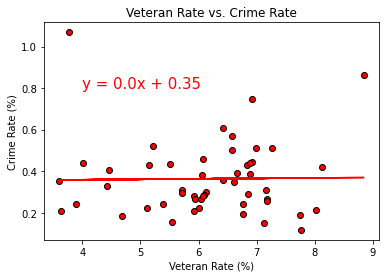

In [20]:
x_values = cleandata["Veteran Rate"]
y_values = cleandata["Crime Rate"]
plt.xlabel('Veteran Rate (%)')
plt.ylabel('Crime Rate (%)')
plt.title("Veteran Rate vs. Crime Rate")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(4,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/VeteranRate.png")
plt.show